# RL_Tutorial

First we create the virtual environment where we want to save all the needed packages. 
1. Create a Python 3 virtual environment  
`virtualenv ~/no_backup/venv_ml -p python3.5`

2. Activate the virtual environment by running the command  
`source ~/no_backup/venv_ml/bin/activate`

3. Install the required packages   
`pip3 install -r requirements.txt` 

4. Show a list of all installed packages  
`pip3 list --local`

5. install the activated environment as an ipython kernel  
`ipython kernel install --user --name=venv_ml`

6. Deactivate the environment, When you finish your work   
`deactivate`

## OpenAi Gym

CarRacing-v0 is easiest continuous control task to learn from pixels, a top-down racing environment. Discreet control is reasonable in this environment as well, on/off discretisation is fine.

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

Install gym with **CarRacing** environments using the command  
`pip install 'gym[box2d-py]'`

Now you can import gym and creat your environemt 

In [1]:
import gym
# Create and wrap the environment
env = gym.make('CarRacing-v0')

### Action space
The action space is the set of triples $(s, a, d) ∈ [−1, 1] × [0, 1] × [0, 1]$, where the steering coefficient $s$ ranges from hard left to hard right, the acceleration $a$ ranges from none to full steam ahead, and the deceleration $d$ ranges from none to slamming the brakes.

In [2]:
env.action_space

Box(3,)

Box(3,) means that the action space of our system has 3 actions that are continuous. If we use the same command for env like CartPole we get Discrete(4)

In [4]:
# The number of actions which we can control
env.action_space.shape

(3,)

In [5]:
# Get a sample
env.action_space.sample()

array([0.30703196, 0.03470271, 0.57537013], dtype=float32)

to get the range of the action space we can use

In [6]:
print(env.action_space.high)
print(env.action_space.low)

[1. 1. 1.]
[-1.  0.  0.]


### Observation Space
The observation is a 96 × 96 × 3 grid of RGB values.

In [7]:
env.observation_space

Box(96, 96, 3)

Box(96, 96, 3) is an rgp image. Let's rest the system and see the initail observation

### Reward Function:
Reward is -0.1 every frame and $\frac{+1000}{N}$ for every track tile visited, where N is the total number of tiles in track. For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points. 



## Make a Step:
Episode finishes when all tiles are visited.

In [8]:
env.reset()
# Sample an action
action = env.action_space.sample()
# Get the next observation, reward and the done flag from the area. 
observation, reward, done, _ = env.step(action)
print("The shape of the observiation: ", np.shape(observation))
print("Reward: ", reward)
print("Is done: ", done)
# Close the rendering
env.close()

Track generation: 994..1247 -> 253-tiles track
The shape of the observiation:  (96, 96, 3)
Reward:  7.836507936507937
Is done:  False


## Random politics
Let's try to move the car with the simplest policy by moving the car with actions sampled from the action space.

In [9]:
for i_episode in range(5):
    # Get initial observation 
    observation = env.reset()
    for t in range(1000):
        # render the environment at each step
        env.render()
        # move the car using the sampled actions
        action = env.action_space.sample()
        observation, reward, done, _ = env.step(env.action_space.sample())
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
# Close the rendering
env.close()

Track generation: 1188..1489 -> 301-tiles track
Episode finished after 1000 timesteps
Track generation: 1168..1464 -> 296-tiles track
Episode finished after 1000 timesteps
Track generation: 1137..1433 -> 296-tiles track


KeyboardInterrupt: 

Some indicators shown at the bottom of the window and the state RGB buffer. From left to right: true speed, four ABS sensors, steering wheel position, gyroscope

## OpenAi Baselines 

Stable Baselines maybe is better choise than OpenAi Baselines but if you want to install the OpenAi Baselines use the following steps
1. git clone https://github.com/openai/baselines.git
2. remove 'gym>=0.10.0, <1.0.0' from install_requires in setup.py
```python
install_requires=[
         'gym>=0.10.0, <1.0.0',
         'scipy',
         'tqdm',
         'joblib',
         'cloudpickle',
         'click',
         'opencv-python'
     ],
```

3. `pip install -e .`

If all goes well, you should see this.
Successfully installed baselines

### Training models with OpenAi Baselines 
The first step which we should do is to export the logger path. For all algorithms in baselines, the summery data is stored in a folder defined by the logger.  


In [1]:
!mkdir ./logs

mkdir: cannot create directory ‘./logs’: File exists


In [2]:
!mkdir ./model

To start the training you can run ` baselines.run` with different arguments:
* --alg: The name of the used algorithm to train the agent (a2c ,ppo2, ...)
* --env: the name of openAi Gym Environement (CarRacing, Humanoid,....)
* --network: The network used to approximate Policy/ Vaule function (MLP, CNN,...)
* --num_timesteps: The number of timesteps
* --save_path and --load_path: loads the tensorflow state from a given path before training, and saves it after the training,

In [10]:
!OPENAI_LOGDIR=./logs/carracing_a2c OPENAI_LOG_FORMAT=csv python -m baselines.run --alg=a2c --env=CarRacing-v0 --network=cnn --num_timesteps=300 --nsteps=32 --save_path=./model/carracing_30000_a2

env_type: box2d
2019-05-29 18:01:21.623787: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-05-29 18:01:21.626790: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2808000000 Hz
2019-05-29 18:01:21.627228: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x4834a50 executing computations on platform Host. Devices:
2019-05-29 18:01:21.627254: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
Training a2c on box2d:CarRacing-v0 with arguments 
{'network': 'cnn', 'nsteps': 32}
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.cast instead.
Track generation: 1375..1723 -> 348-tiles track


### Loading and visualizing the results:

In [11]:
from baselines.common import plot_util as pu
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
data = pd.read_csv('./logs/carracing_a2c/0.0.monitor.csv')
data.head()

,"# {""env_id"": ""CarRacing-v0""","""t_start"": 1559145681.63662}"
r,l,t


In [14]:
data_prog = pd.read_csv('./logs/carracing_a2c/progress.csv')
data_prog.head()

,eplenmean,eprewmean,explained_variance,fps,nupdates,policy_entropy,total_timesteps,value_loss
0,NaN,NaN,0.022072,61,1,4.256815,32,3.18424


Where:
* **eplenmean:** Episode length mean.
* **eprewmean:** Episode reward mean.
* **fps:**  Frame per second.
* **nupdates:** Timesteps divided by number of batches.
* **policy_entropy:**  
* **total_timesteps:**  Number of timesteps (i.e. number of actions taken in the environment).
* **value_loss**

Bаselines provides helper functions to load the summaries of the results as pandas dataframes.

In [15]:
results = pu.load_results('./logs/carracing_a2c')
r = results[0]

/home/karam/workspaces/reinforcement_learning/baselines/baselines/bench/monitor.py:163: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


A learning curve from a single run can be plotted as follows

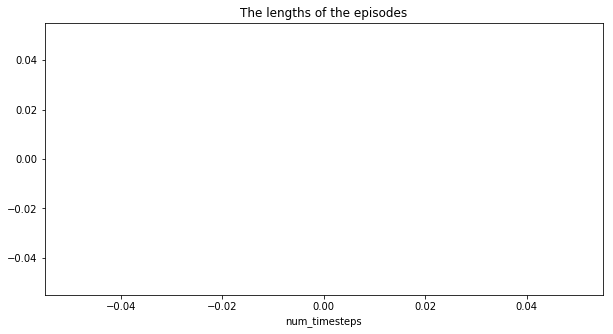

In [16]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(r.monitor.l), r.monitor.r)
plt.title("The lengths of the episodes")
plt.xlabel("num_timesteps");

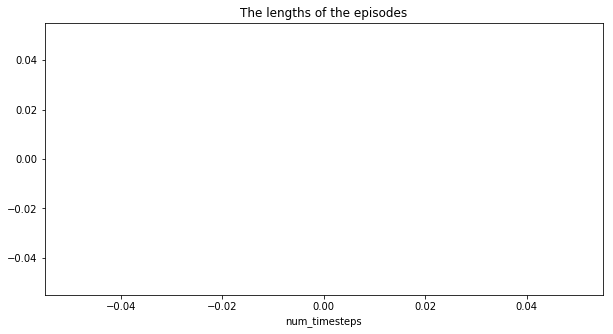

In [17]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(r.monitor.l), pu.smooth(r.monitor.r, radius=10))
plt.title("The lengths of the episodes")
plt.xlabel("num_timesteps");


## OpenAi Stable Baselines 
A stable baseline is a good adaptation to OpenAi Baseline. bYou only need one of them.

To install Stable Baselines only you should run  
`pip install stable-baselines`  
to see more use the [link](https://stable-baselines.readthedocs.io/en/master/guide/install.html)


## Policy Gradient Method:
To have some fun, we will implement the Policy Gradient Method (Actor Critic) from scratch :) :)

### Feedforward Neural Network:
Build the a feedforward neural network to approximate the dynamic model (model-based-RL), the Policy or the Value function (model-free-RL)

In [ ]:
def mlp(x, hidden_sizes, scope  ,activation=tf.tanh, output_activation=None):
    with tf.variable_scope(scope):
        for h in hidden_sizes[:-1]:
            x = tf.layers.dense(x, units=h, activation=activation)
        out = tf.layers.dense(x, units=hidden_sizes[-1], activation=output_activation)
    return out

### Policies in RL
There are two types of policies for reinforcmenet learning: 
* **Categorical Policy:** Choose an action from a variety of discrete actions.
* **gaussian_policy:** Sample of an action from a Gauissan distribution of possible actions (continuous)

In [ ]:
def mlp_categorical_policy(x, a, hidden_sizes, activation, output_activation, action_space):
    # The number of network outputs is equal to the number of Environment Actions.
    act_dim = action_space.n
    # Approximate the network using FNN 
    logits = mlp(x, list(hidden_sizes)+[act_dim], activation, None)
    # use a multinomial distribution to sample one of the action 
    # the bigger value of logits is more to be sampled.    
    pi = tf.squeeze(tf.multinomial(logits,1), axis=1)
    return pi

In [ ]:
def mlp_gaussian_policy(x, a, hidden_sizes, activation, output_activation, action_space):
    act_dim = a.shape.as_list()[-1]
    mu = mlp(x, list(hidden_sizes)+[act_dim], activation, output_activation)
    log_std = tf.get_variable(name='log_std', initializer=-0.5*np.ones(act_dim, dtype=np.float32))
    std = tf.exp(log_std)
    pi = mu + tf.random_normal(tf.shape(mu)) * std
    return pi

### Actor-Critics
Policy network (Actor) to select the optimal action and value function network (Critic) to evaluate these actions.

In [ ]:
def mlp_actor_critic(x, a, hidden_sizes=(64,64), activation=tf.tanh, 
                     output_activation=None, policy=None, action_space=None):

    # default policy builder depends on action space  (Continuous)
    if policy is None and isinstance(action_space, Box):
        policy = mlp_gaussian_policy
    # Discrete
    elif policy is None and isinstance(action_space, Discrete):
        policy = mlp_categorical_policy
    
    # The Actor
    with tf.variable_scope('pi'):
        pi = policy(x, a, hidden_sizes, activation, output_activation, action_space)
        
    # The Critic
    with tf.variable_scope('v'):
        v = tf.squeeze(mlp(x, list(hidden_sizes)+[1], activation, None), axis=1)
        
    return pi, v

### Trian the Policy:
TODO

##  Wrapper:
To use Carla Simualtion with "OpenAi Baselines", we need an interface (wrapper) that defines the Carla Simulator as OpenAi Gym environment. 

You should not create your interface as it requires a lot of work and there are many good implementations on Github. We will try to find the best for you, but you may need to understand part of it because you need to customize it to achieve the goal of your algorithm. 

The following thing you may need to customize 
* Observation room,
* Reward function
* Flage done

### Example: Reward Function
The reward used for training in the original [CARLA](http://proceedings.mlr.press/v78/dosovitskiy17a/dosovitskiy17a.pdf) paper is a weighted sum of five terms: 
* Distance traveled towards the goal d in km,
* Speed v in km/h,
* Collision damage c,
* Intersection with the sidewalk s (between 0 and 1), and
* iIntersection with the opposite lane o (between 0 and 1)"

In [ ]:
def get_reward(self, measurements, target, direction, action, env_state):
    
    # Distance towards goal (in km)
    d_x = measurements.player_measurements.transform.location.x
    d_y = measurements.player_measurements.transform.location.y
    d_z = measurements.player_measurements.transform.location.z
    player_location = np.array([d_x, d_y, d_z])
    goal_location = np.array([target.location.x,
                              target.location.y,
                              target.location.z])
    d = np.linalg.norm(player_location - goal_location) / 1000

    # Speed
    v = measurements.player_measurements.forward_speed * 3.6
    # Collision damage
    c_v = measurements.player_measurements.collision_vehicles
    c_p = measurements.player_measurements.collision_pedestrians
    c_o = measurements.player_measurements.collision_other
    c = c_v + c_p + c_o

    # Intersection with sidewalk
    s = measurements.player_measurements.intersection_offroad

    # Intersection with opposite lane
    o = measurements.player_measurements.intersection_otherlane

    # Compute reward
    r = 0
    if self.state is not None:
        r += 1000 * (self.state['d'] - d)
        r += 0.05 * (v - self.state['v'])
        r -= 0.00002 * (c - self.state['c'])
        r -= -0.1 * float(s > 0.001)
        r -= 2 * (o - self.state['o'])

    # Update state
    new_state = {'d': d, 'v': v, 'c': c, 's': s, 'o': o,
                 'd_x': d_x, 'd_y': d_y, 'd_z': d_z,
                 'c_v': c_v, 'c_p': c_p, 'c_o': c_o}
    self.state = new_state

    return r

## REF:
* https://github.com/openai/baselines/blob/master/README.md#training-models
* https://github.com/openai/baselines/blob/3301089b48c42b87b396e246ea3f56fa4bfc9678/README.md
* https://github.com/openai/baselines/blob/master/docs/viz/viz.ipynb
* https://github.com/openai/baselines/blob/a89bee3c8dc9dde97e32ad7be32d7db31245c3fe/baselines/deepq/experiments/custom_cartpole.py